In [1]:
import opensim as osim
import numpy as np
import os

In [2]:
current_path = os.getcwd()
#geometries_path = current_path + '\Geometry'

#Load model
model = osim.Model(f'{current_path}\GripForceModels\Grip_Model_Flexed.osim')
state = model.initSystem()

#modelViz = model.getVisualizer()
#modelViz.addDirToGeometrySearchPaths(geometries_path)


#Instantiate forward dynamics tool
forwardDyn = osim.ForwardTool()

#Simulation time range
startTime = 0.0
endTime = 0.15

#Set forward dynamics options and load controls
forwardDyn.setModel(model)
controller = osim.PrescribedController(f'{current_path}\GripForceModels\controls_Flexed.sto')
controllerSet = forwardDyn.getControllerSet()
controllerSet.adoptAndAppend(controller)
forwardDyn.addControllerSetToModel()
forwardDyn.setInitialTime(startTime)
forwardDyn.setFinalTime(endTime)
forwardDyn.setStartTime(startTime)
forwardDyn.setSolveForEquilibrium(True)
forwardDyn.setMaxDT = 0.0001

#Setup analysis set
parentStr = osim.ArrayStr()
parentStr.append("parent")
analysisSet = forwardDyn.getAnalysisSet()

# Add a joint reaction analysis to the tool
jointReactionAnalysis = osim.JointReaction(model)
jointReactionAnalysis.setInFrame(parentStr)
jointReactionAnalysis.setOnBody(parentStr)
jointReactionAnalysis.setName("JointReactionAnalysis")
analysisSet.adoptAndAppend(jointReactionAnalysis)

# Add a force reporter analysis to the tool
forceReporterAnalysis = osim.ForceReporter(model)
analysisSet.adoptAndAppend(forceReporterAnalysis)

forwardDyn.addAnalysisSetToModel()

# Run the simulation
forwardDyn.setResultsDir(current_path)
forwardDyn.setPrintResultFiles(True)
forwardDyn.run()


#visualizer = osim.VisualizerUtilities
#visualizer.showModel(model)

True

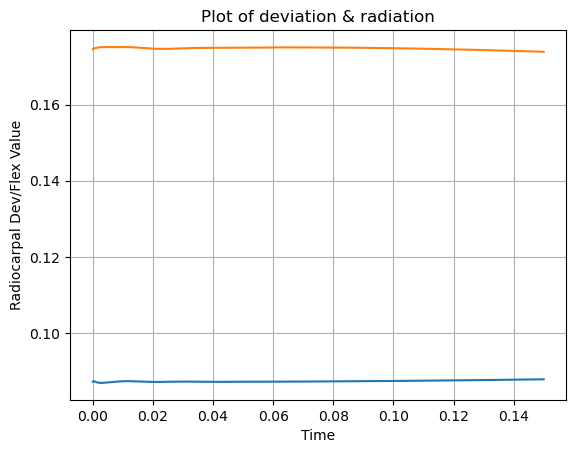

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

results_path = f'{current_path}\_states.sto'

# Load data from states .sto file
data = pd.read_csv(results_path, delimiter='\t', skiprows=6)

# Extract data to plot
time = data['time']
dev = '/jointset/radiocarpal/deviation/value'
flex = '/jointset/radiocarpal/flexion/value'

# Plot the data
plt.plot(time,data[dev], label='deviation')
plt.plot(time,data[flex], label='radiation')
plt.xlabel('Time')
plt.ylabel('Radiocarpal Dev/Flex Value')
plt.title('Plot of deviation & radiation')
plt.grid(True)
plt.show()

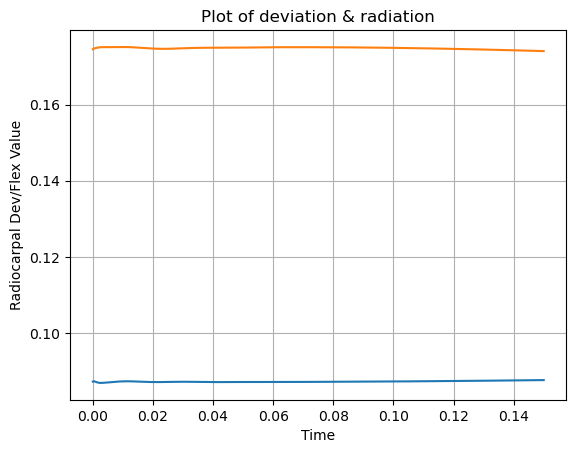

In [4]:
results_path = "C:\OpenSim 4.4\ARMS_Wrist_Hand_Model_4.3\ARMS_Wrist_Hand_Model_4.3\ARMS Tutorials\CompareResults\Forward Grip Module\Flexed_Posture\grip_strength_states.sto"

# Load data from states .sto file
data = pd.read_csv(results_path, delimiter='\t', skiprows=6)

# Extract data to plot
time = data['time']
dev = '/jointset/radiocarpal/deviation/value'
flex = '/jointset/radiocarpal/flexion/value'

# Plot the data
plt.plot(time,data[dev], label='deviation')
plt.plot(time,data[flex], label='radiation')
plt.xlabel('Time')
plt.ylabel('Radiocarpal Dev/Flex Value')
plt.title('Plot of deviation & radiation')
plt.grid(True)
plt.show()

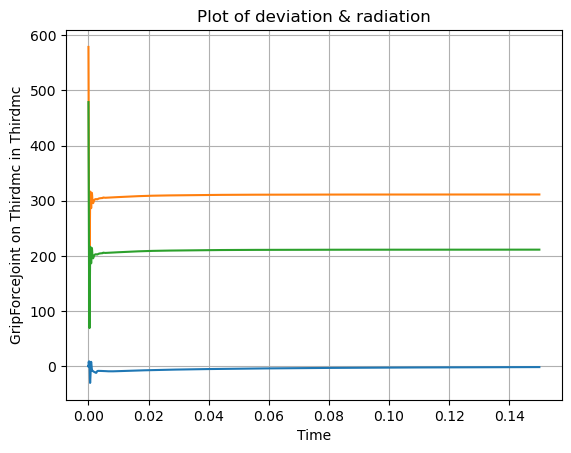

In [8]:
results_path = f'{current_path}\_JointReactionAnalysis_ReactionLoads.sto'

# Load data from states .sto file
data = pd.read_csv(results_path, delimiter='\t', skiprows=11)

# Extract data to plot
time = data['time']
fx = 'GripForceJoint_on_thirdmc_in_thirdmc_fx'
fy = 'GripForceJoint_on_thirdmc_in_thirdmc_fy'
fz = 'GripForceJoint_on_thirdmc_in_thirdmc_fy'

# Plot the data
plt.plot(time,data[fx], label='fx')
plt.plot(time,data[fy], label='fy')
plt.plot(time,data[fz], label='fz')
plt.xlabel('Time')
plt.ylabel('GripForceJoint on Thirdmc in Thirdmc')
plt.title('Plot of deviation & radiation')
plt.grid(True)
plt.show()

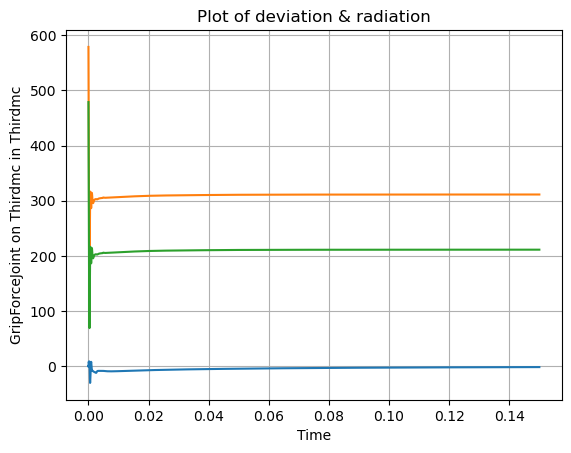

In [10]:
results_path = "C:\OpenSim 4.4\ARMS_Wrist_Hand_Model_4.3\ARMS_Wrist_Hand_Model_4.3\ARMS Tutorials\CompareResults\Forward Grip Module\Flexed_Posture\grip_strength_JointReaction_ReactionLoads.sto"

# Load data from states .sto file
data = pd.read_csv(results_path, delimiter='\t', skiprows=11)

# Extract data to plot
time = data['time']
fx = 'GripForceJoint_on_thirdmc_in_thirdmc_fx'
fy = 'GripForceJoint_on_thirdmc_in_thirdmc_fy'
fz = 'GripForceJoint_on_thirdmc_in_thirdmc_fy'

# Plot the data
plt.plot(time,data[fx], label='fx')
plt.plot(time,data[fy], label='fy')
plt.plot(time,data[fz], label='fz')
plt.xlabel('Time')
plt.ylabel('GripForceJoint on Thirdmc in Thirdmc')
plt.title('Plot of deviation & radiation')
plt.grid(True)
plt.show()